In [172]:
import networkx as nx
import matplotlib.pyplot as plt

def show(G):
    print('---\nNodes: ', G.nodes, '\nEdges: ', G.edges)

def showWithData(G):
    print('---\nNodes: ', G.nodes(data=True), '\nEdges: ', G.edges(data=True))

## Edge lists

In [173]:
from pathlib import Path
data_dir = Path('.') / 'data'

G = nx.read_edgelist(data_dir / 'data.ex0.edgelist')
show(G)

W = nx.read_weighted_edgelist(data_dir / 'data.ex1.edgelist', create_using=nx.DiGraph) 
showWithData(W)
print(W.edges['A','B'])

G2 = nx.read_edgelist(data_dir / 'data.ex2.edgelist',
                      data=[('weight', float), ('color', str)]) # attributes
showWithData(G2)

nx.write_edgelist(G2, data_dir / "data.ex2.out.edgelist")
nx.write_adjlist(G2, data_dir / "data.ex2.out.adjlist")

G3 = nx.read_edgelist(data_dir / "data.ex2.out.edgelist")
showWithData(G3)

---
Nodes:  ['A', 'D', 'C', 'B'] 
Edges:  [('A', 'C'), ('A', 'B'), ('D', 'B')]
---
Nodes:  [('A', {}), ('D', {}), ('C', {}), ('B', {})] 
Edges:  [('A', 'C', {'weight': 2.0}), ('A', 'B', {'weight': 1.0}), ('B', 'D', {'weight': 2.0})]
{'weight': 1.0}
---
Nodes:  [('A', {}), ('C', {}), ('B', {})] 
Edges:  [('A', 'C', {'weight': 2.0, 'color': 'bar'}), ('A', 'B', {'weight': 5.0, 'color': 'foo'})]
---
Nodes:  [('A', {}), ('B', {}), ('C', {})] 
Edges:  [('A', 'B', {'weight': 5.0, 'color': 'foo'}), ('A', 'C', {'weight': 2.0, 'color': 'bar'})]


## Adjacency list

In [174]:
G = nx.read_adjlist(data_dir / 'data.ex3.adjlist')
show(G)

---
Nodes:  ['A', 'D', 'C', 'B'] 
Edges:  [('A', 'D'), ('A', 'C'), ('A', 'B'), ('D', 'C'), ('D', 'B')]


## GEXF (Graph Exchange XML Format) and JSON-based formats

In [175]:
import sys
nx.write_gexf(G3, sys.stdout)

print("\n\n",nx.node_link_data(G))

<?xml version='1.0' encoding='utf-8'?>
<gexf version="1.2" xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.w3.org/2001/XMLSchema-instance">
  <graph defaultedgetype="undirected" mode="static" name="">
    <attributes class="edge" mode="static">
      <attribute id="0" title="color" type="string" />
    </attributes>
    <meta>
      <creator>NetworkX 2.2</creator>
      <lastmodified>11/03/2020</lastmodified>
    </meta>
    <nodes>
      <node id="A" label="A" />
      <node id="B" label="B" />
      <node id="C" label="C" />
    </nodes>
    <edges>
      <edge id="0" source="A" target="B" weight="5.0">
        <attvalues>
          <attvalue for="0" value="foo" />
        </attvalues>
      </edge>
      <edge id="1" source="A" target="C" weight="2.0">
        <attvalues>
          <attvalue for="0" value="bar" />
        </attvalues>
      </edge>
    </edges>
  </graph>
</gexf>


 {'directed': False, 'graph'

## Example of manual network construction: co-occurrence network

In [176]:
import re
stop_words = set(['the', 'of', 'and', 'i', 'which','might','that','my','had','with','been','as','it','but',
                  'to','a','in','his','he','was','me','your','you','she','her','not','for','will','be','by',
                  'on','this','when','have','would','they','them','should','at','from','more','so','than','do',
                  'our','we','if','were','are','is','what','no','one','who','him','or','any','many','how','all']) # to be ignored

def co_occurrence_network(text):
  G = nx.Graph()
  sentences = text.split('.')
  for s in sentences:
    clean = re.sub('[^\w\n ]+', '', s).lower()
    clean = re.sub('_+', '', clean).strip()
    words = re.split('\s+', clean)
    for v in words:
      try:
        G.nodes[v]['count'] += 1
      except KeyError:
        G.add_node(v)
        G.nodes[v]['count'] = 1
      for w in words:
        if v == w or v in stop_words or w in stop_words: continue
        if len(v) == 0 or len(w) == 0: continue
        try: G.edges[v, w]['count'] += 1
        except KeyError: G.add_edge(v, w, count=1)
  return G

with open(str(data_dir / 'document-frankenstein.txt')) as f: text = f.read()
G = co_occurrence_network(text)
pairs = sorted(G.edges(data=True), key=lambda e: e[2]['count'], reverse=True)
print(pairs[0:10])

[('man', 'old', {'count': 68}), ('now', 'even', {'count': 38}), ('country', 'native', {'count': 38}), ('their', 'could', {'count': 36}), ('these', 'feelings', {'count': 36}), ('myself', 'could', {'count': 36}), ('yet', 'did', {'count': 36}), ('some', 'an', {'count': 36}), ('shall', 'am', {'count': 36}), ('could', 'only', {'count': 34})]


### Visualising complex graphs

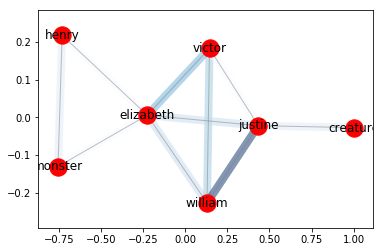

In [177]:
characters = ['creature','monster','victor','elizabeth','william','henry','justine']
G_focus = G.subgraph(characters)
counts = [G_focus.edges[e]['count'] for e in G_focus.edges]
pos = nx.spring_layout(G_focus)
plt.figure()
nx.draw_networkx_nodes(G_focus, pos)
# Draw edges
nx.draw_networkx_edges(
 G_focus, pos, width=8,
 edge_color=counts, edge_cmap=plt.cm.Blues, alpha=0.5)
nx.draw_networkx_edges(G_focus, pos, edge_color="#7f7f7f",alpha=0.5)
# Draw labels
nx.draw_networkx_labels(G_focus, pos)
#plt.tight_layout()
plt.show()